## Installation des packages

Les packages Python sont installés automatiquement à partir du fichier `requirements.txt`

In [1]:
# download requirement
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 51.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 50.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 44.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 6.7 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.

## Téléchargement des données à partir de Kaggle

On télécharge les données grâce à l'API Kaggle de Python

In [2]:
# download dataset zip from Kaggle
!kaggle datasets download jutrera/stanford-car-dataset-by-classes-folder

# unzip data into data folder
!unzip stanford-car-sdataset-by-classes-folder.zip -d data/

Dataset URL: https://www.kaggle.com/datasets/jutrera/stanford-car-dataset-by-classes-folder
License(s): other
100%|█████████████████████████████████████▉| 1.82G/1.83G [00:51<00:00, 47.5MB/s]
100%|██████████████████████████████████████| 1.83G/1.83G [00:51<00:00, 37.9MB/s]
Archive:  stanford-car-dataset-by-classes-folder.zip
  inflating: data/anno_test.csv      
  inflating: data/anno_train.csv     
  inflating: data/car_data/car_data/test/AM General Hummer SUV 2000/00076.jpg  
  inflating: data/car_data/car_data/test/AM General Hummer SUV 2000/00457.jpg  
  inflating: data/car_data/car_data/test/AM General Hummer SUV 2000/00684.jpg  
  inflating: data/car_data/car_data/test/AM General Hummer SUV 2000/01117.jpg  
  inflating: data/car_data/car_data/test/AM General Hummer SUV 2000/01167.jpg  
  inflating: data/car_data/car_data/test/AM General Hummer SUV 2000/01199.jpg  
  inflating: data/car_data/car_data/test/AM General Hummer SUV 2000/01226.jpg  
  inflating: data/car_data/car_data/tes

## Chargement des fichiers csv

In [3]:
import os
import pandas as pd
import s3fs
import zipfile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def read_csv_file(filename, cols):
    df = pd.read_csv(f'data/{filename}.csv', header=None, names=cols)
    print(df.shape)
    return df

In [5]:
names = read_csv_file('names', cols=['name'])
names['id'] = np.arange(1, 197)
names.head()

(196, 1)


name  id
0  AM General Hummer SUV 2000   1
1         Acura RL Sedan 2012   2
2         Acura TL Sedan 2012   3
3        Acura TL Type-S 2008   4
4        Acura TSX Sedan 2012   5

In [6]:
train = read_csv_file('anno_train', cols=['jpg', 'a', 'b', 'c', 'id'])
print(train['id'].unique().shape)
train.head()

(8144, 5)
(196,)


jpg    a     b     c   id
00001.jpg   39  116   569   375   14
00002.jpg   36  116   868   587    3
00003.jpg   85  109   601   381   91
00004.jpg  621  393  1484  1096  134
00005.jpg   14   36   133    99  106

In [7]:
test = read_csv_file('anno_test', cols=['jpg', 'a', 'b', 'c', 'id'])
print(test['id'].unique().shape)
test.head()

(8041, 5)
(196,)


jpg    a    b    c   id
00001.jpg   30   52  246  147  181
00002.jpg  100   19  576  203  103
00003.jpg   51  105  968  659  145
00004.jpg   67   84  581  407  187
00005.jpg  140  151  593  339  185

### Jointure avec le fichier names
Le but est de récupérer pour chaque données de train et de test, le nom du modèle correspondant

In [8]:
def get_model_name(df, name_df):
    df = pd.merge(df, name_df, on='id')
    df = df.drop(['id'], axis=1)
    return df

In [9]:
train = get_model_name(train, names)
test = get_model_name(test, names)

## Plot de la distribution du nombre de classes

- On cherche à observer si il existe des classes qui sont plus présentent dans nos données.
- En cas de déséquilibre, cela pourrait engendrer un biais

In [177]:
def plot_class_count(df, col):
    fig = plt.figure(figsize=(40, 10))
    sns.histplot(data=df, x=col)
    plt.xticks(rotation=90)


    value_counts = df[col].value_counts()
    min_val = value_counts.min()
    max_val = value_counts.max()
    mean_val = value_counts.mean()

    # Tracer les lignes pour min, max et mean
    plt.axhline(min_val, color='red', linestyle='--', label='Min')
    plt.axhline(max_val, color='red', linestyle='--', label='Max')
    plt.axhline(mean_val, color='purple', linestyle='--', label='Mean')

    plt.legend()
    plt.show()

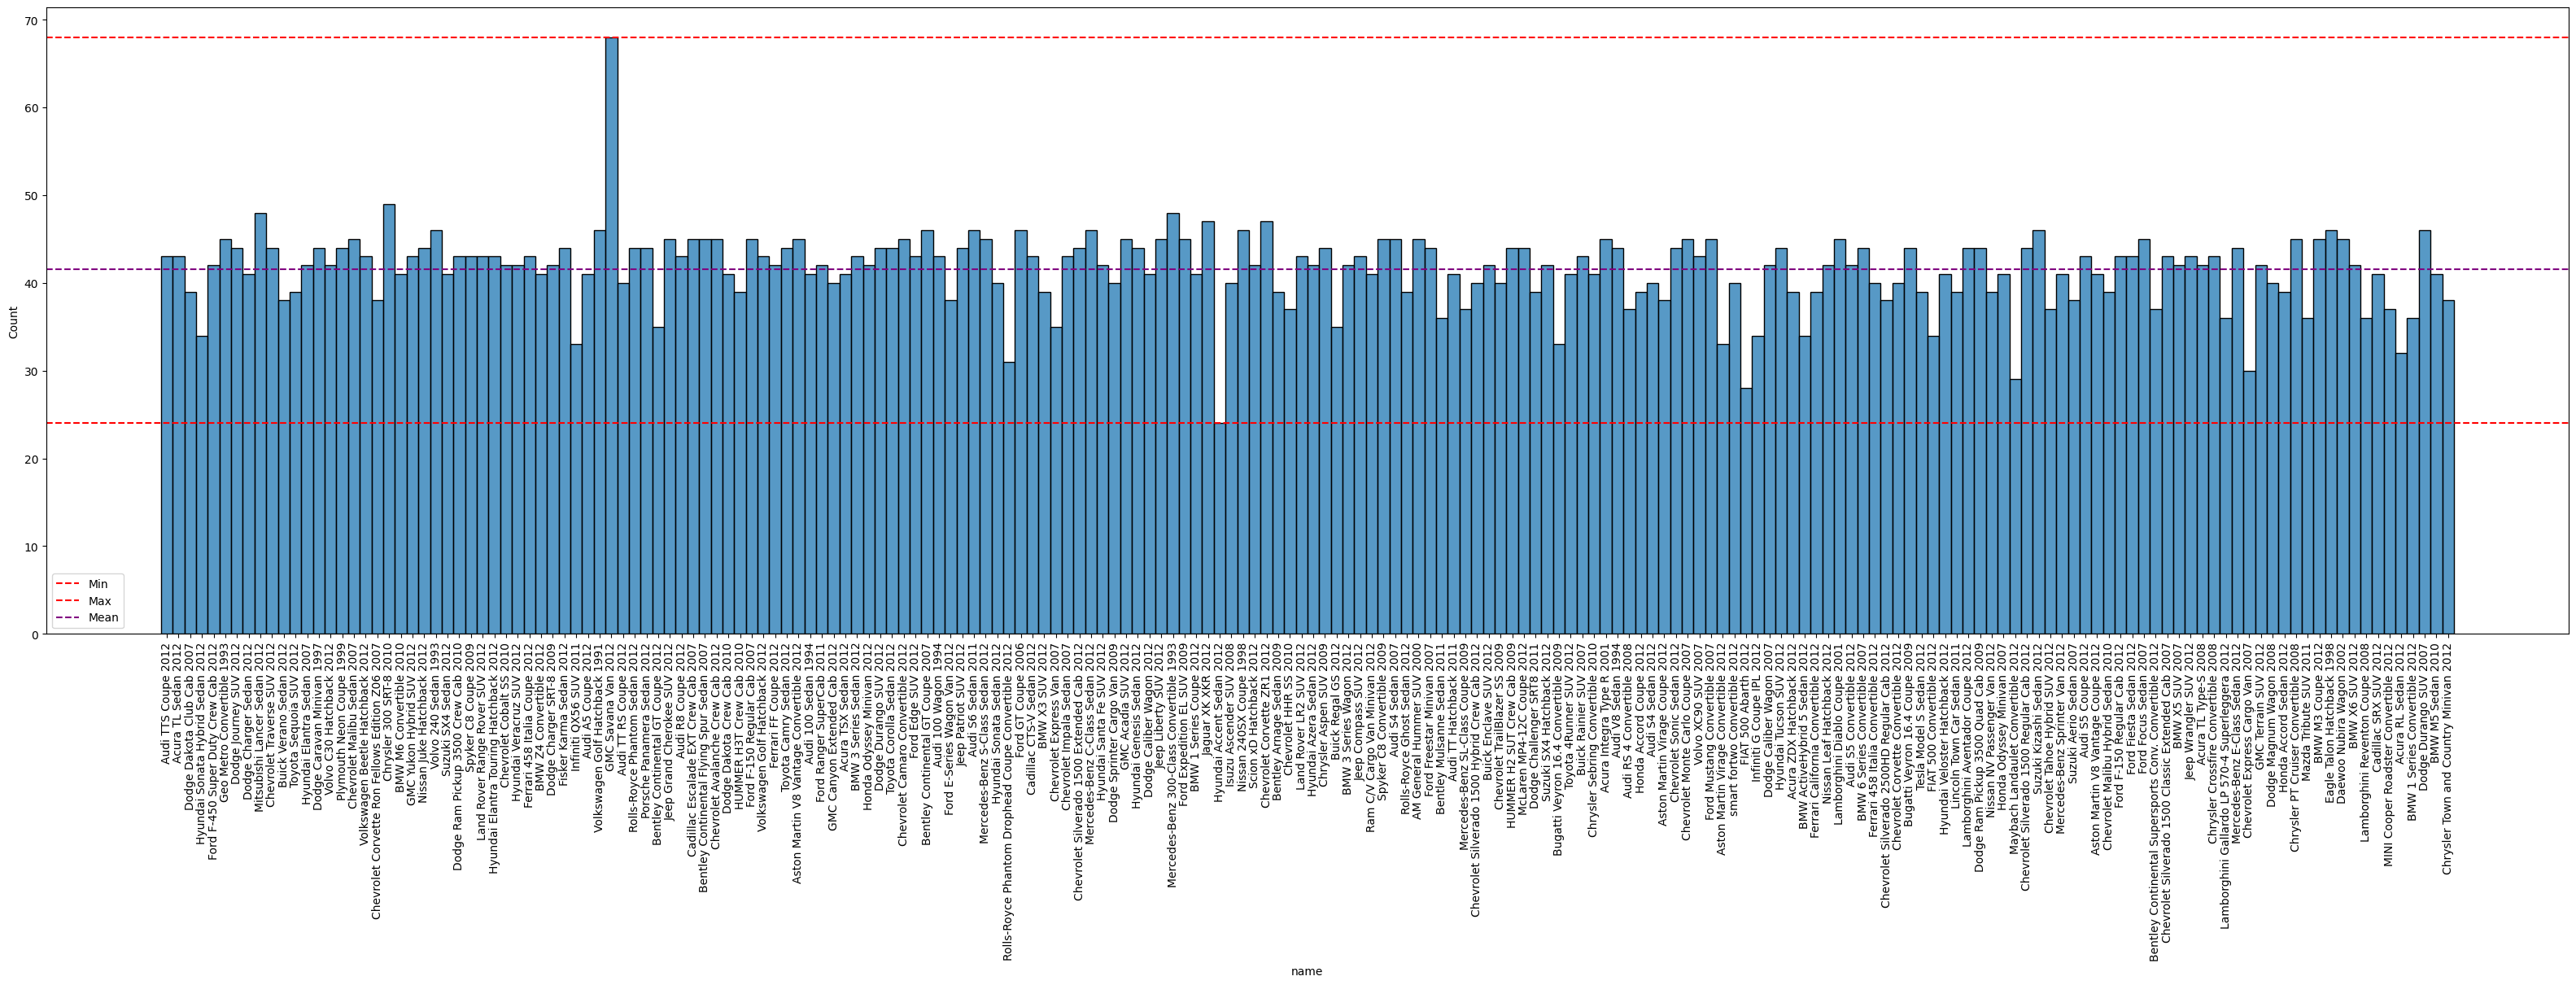

In [191]:
plot_class_count(train, 'name')

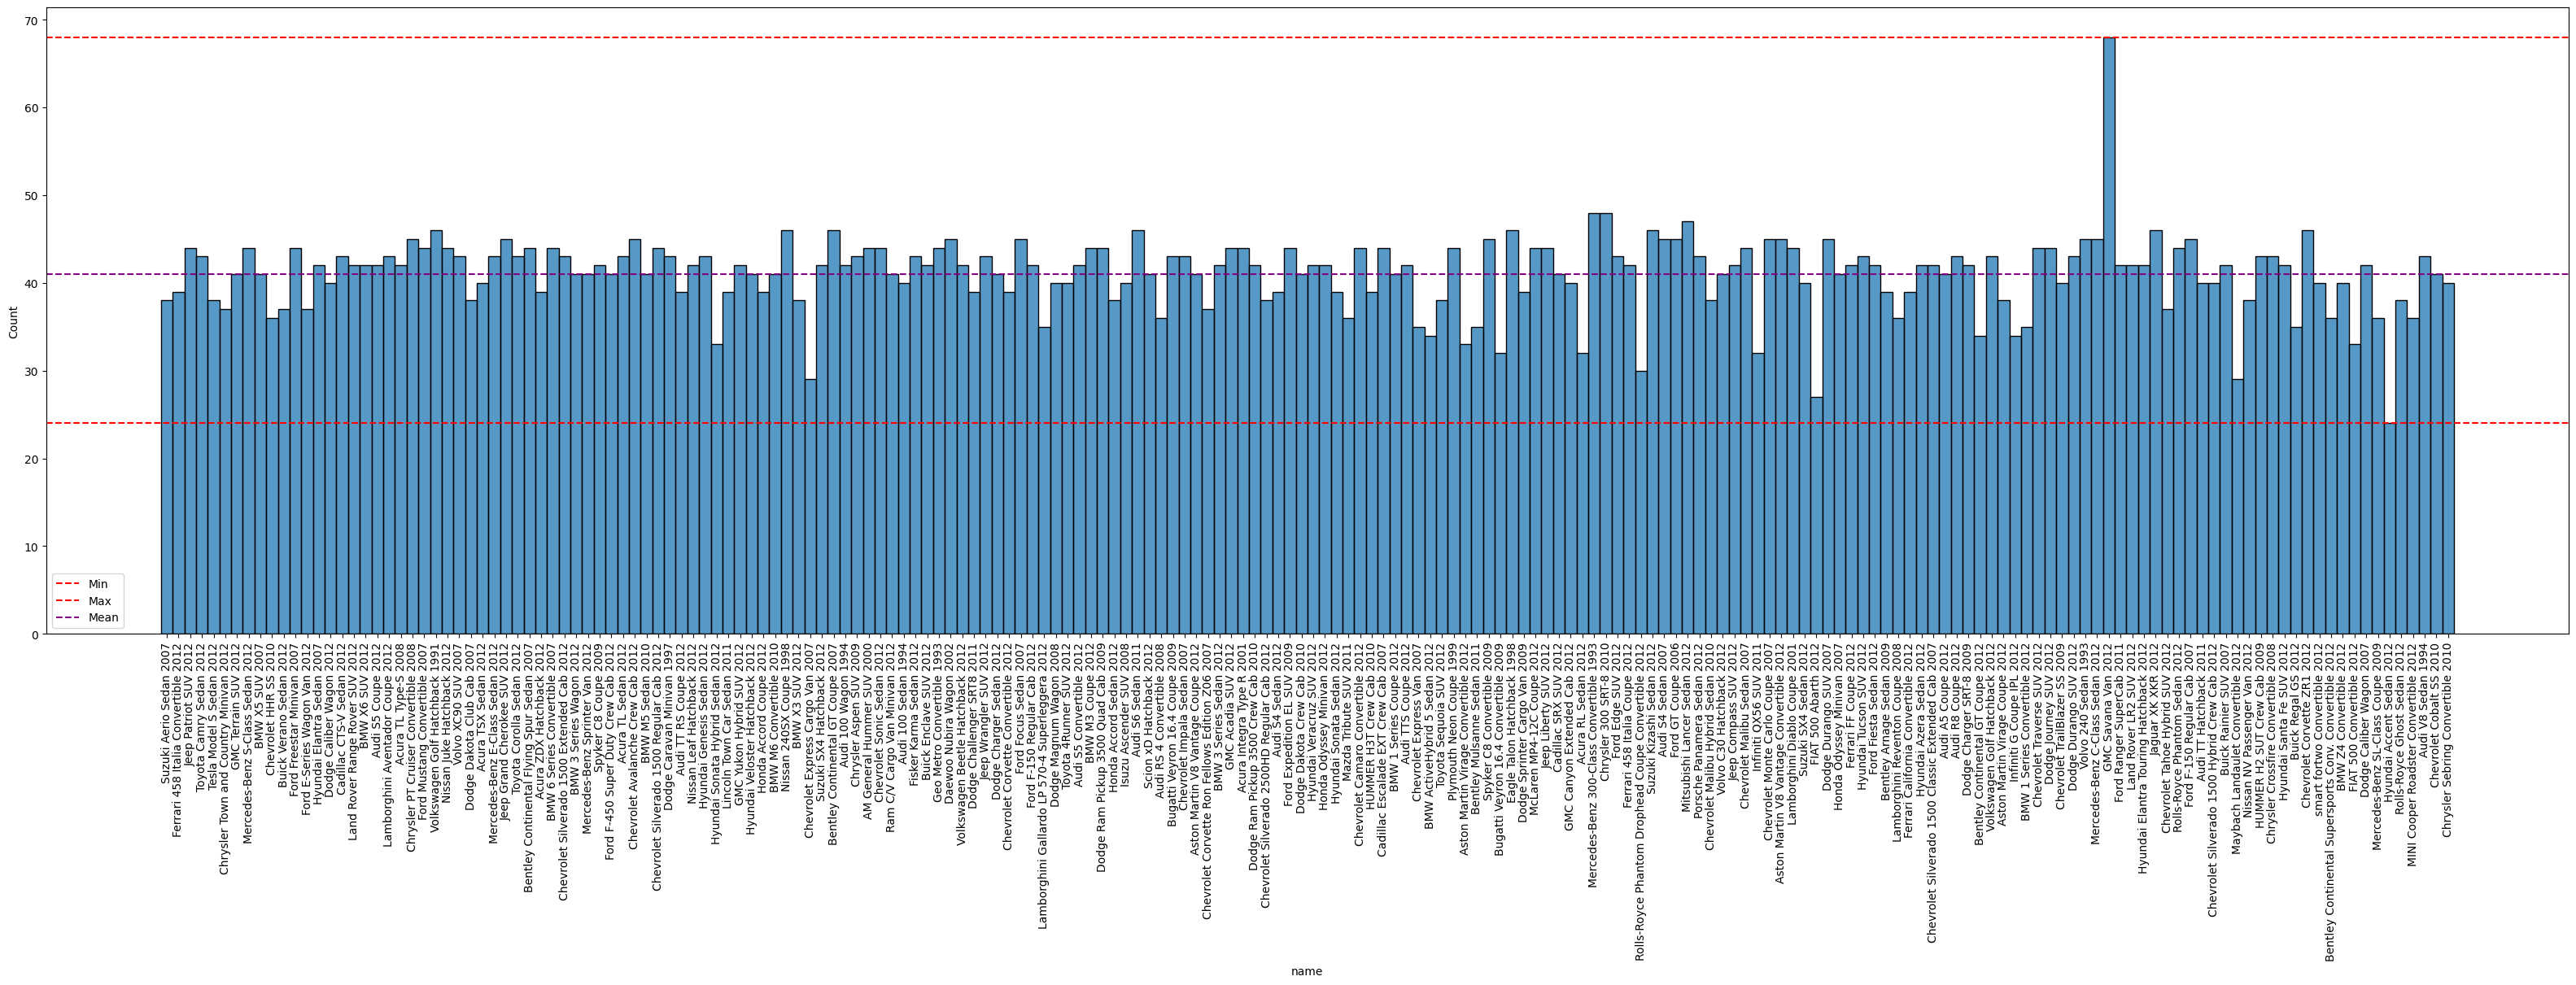

In [179]:
plot_class_count(test, 'name')

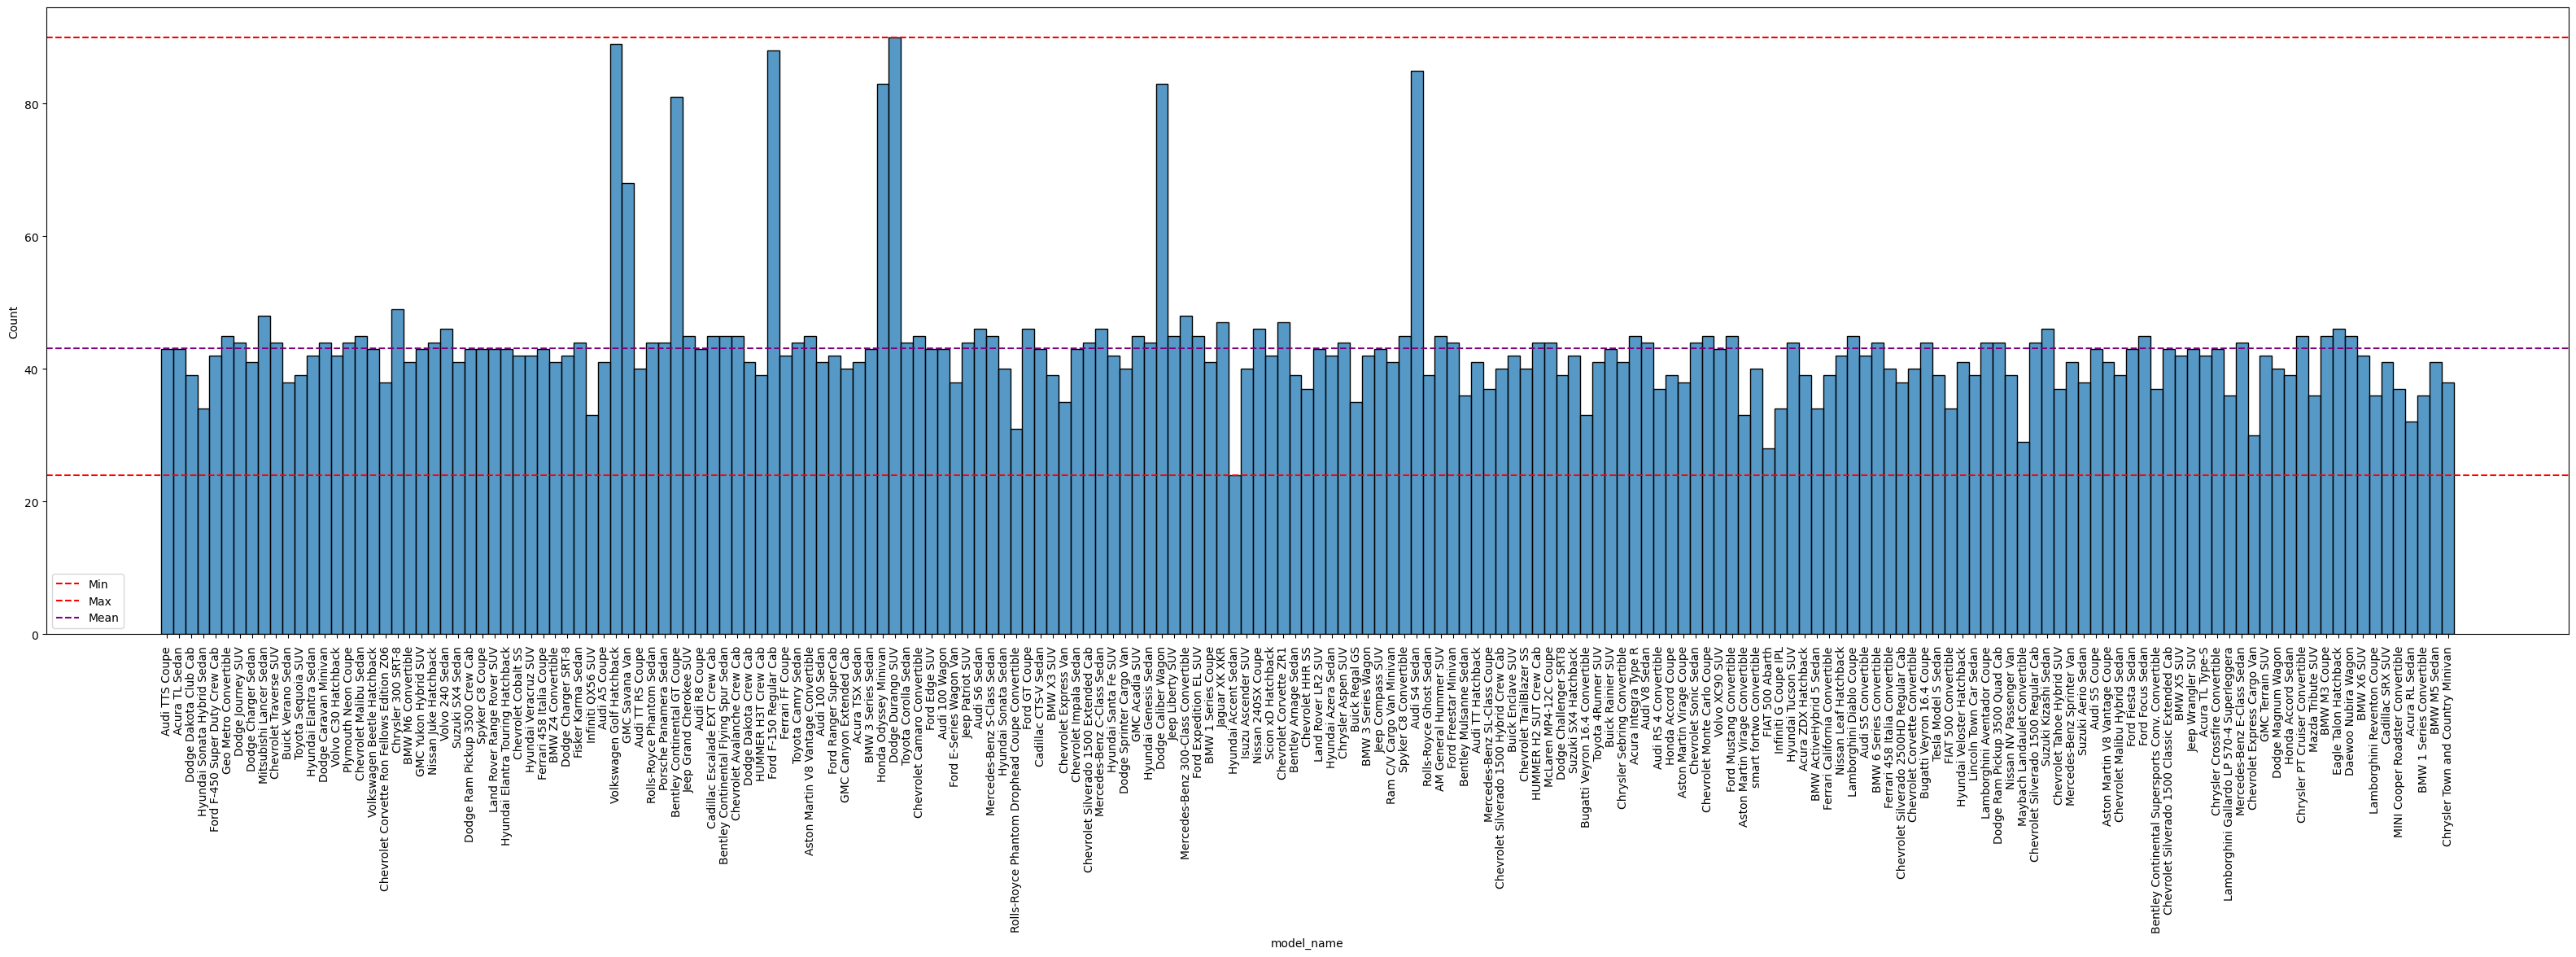

In [180]:
train['year'] = train['name'].str.extract(r'(\b\d{4}\b)$')
train['model_name'] = train['name'].str.replace(r'\b\d{4}\b$', '', regex=True)
plot_class_count(train, 'model_name')

In [181]:
import re

def plot_top_model_without_year(df, col):
    df['year'] = df['name'].str.extract(r'(\b\d{4}\b)$')
    df[col] = df['name'].str.replace(r'\b\d{4}\b$', '', regex=True)

    plot_class_count(df, col)

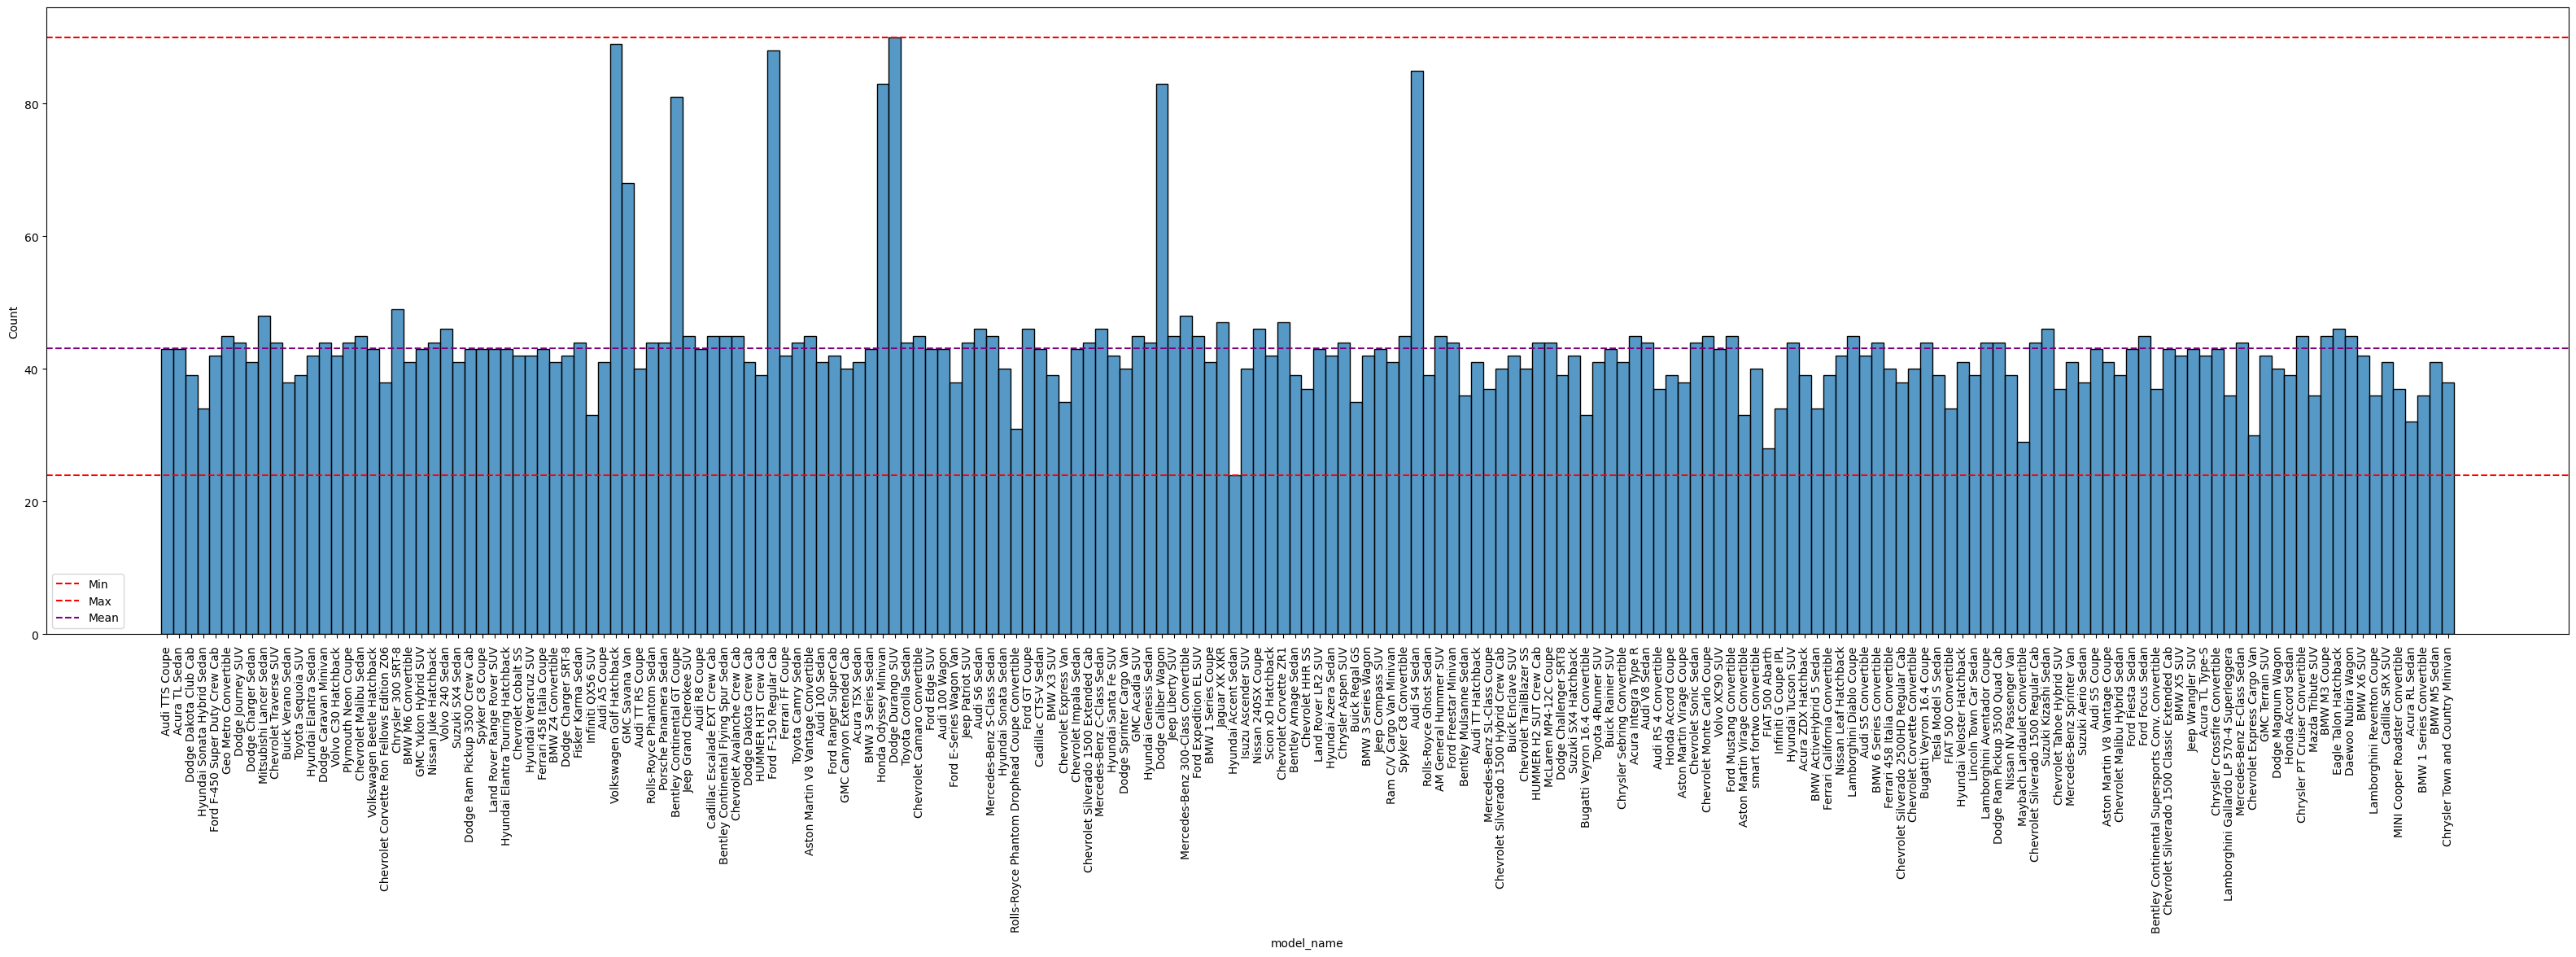

In [182]:
plot_top_model_without_year(train, 'model_name')

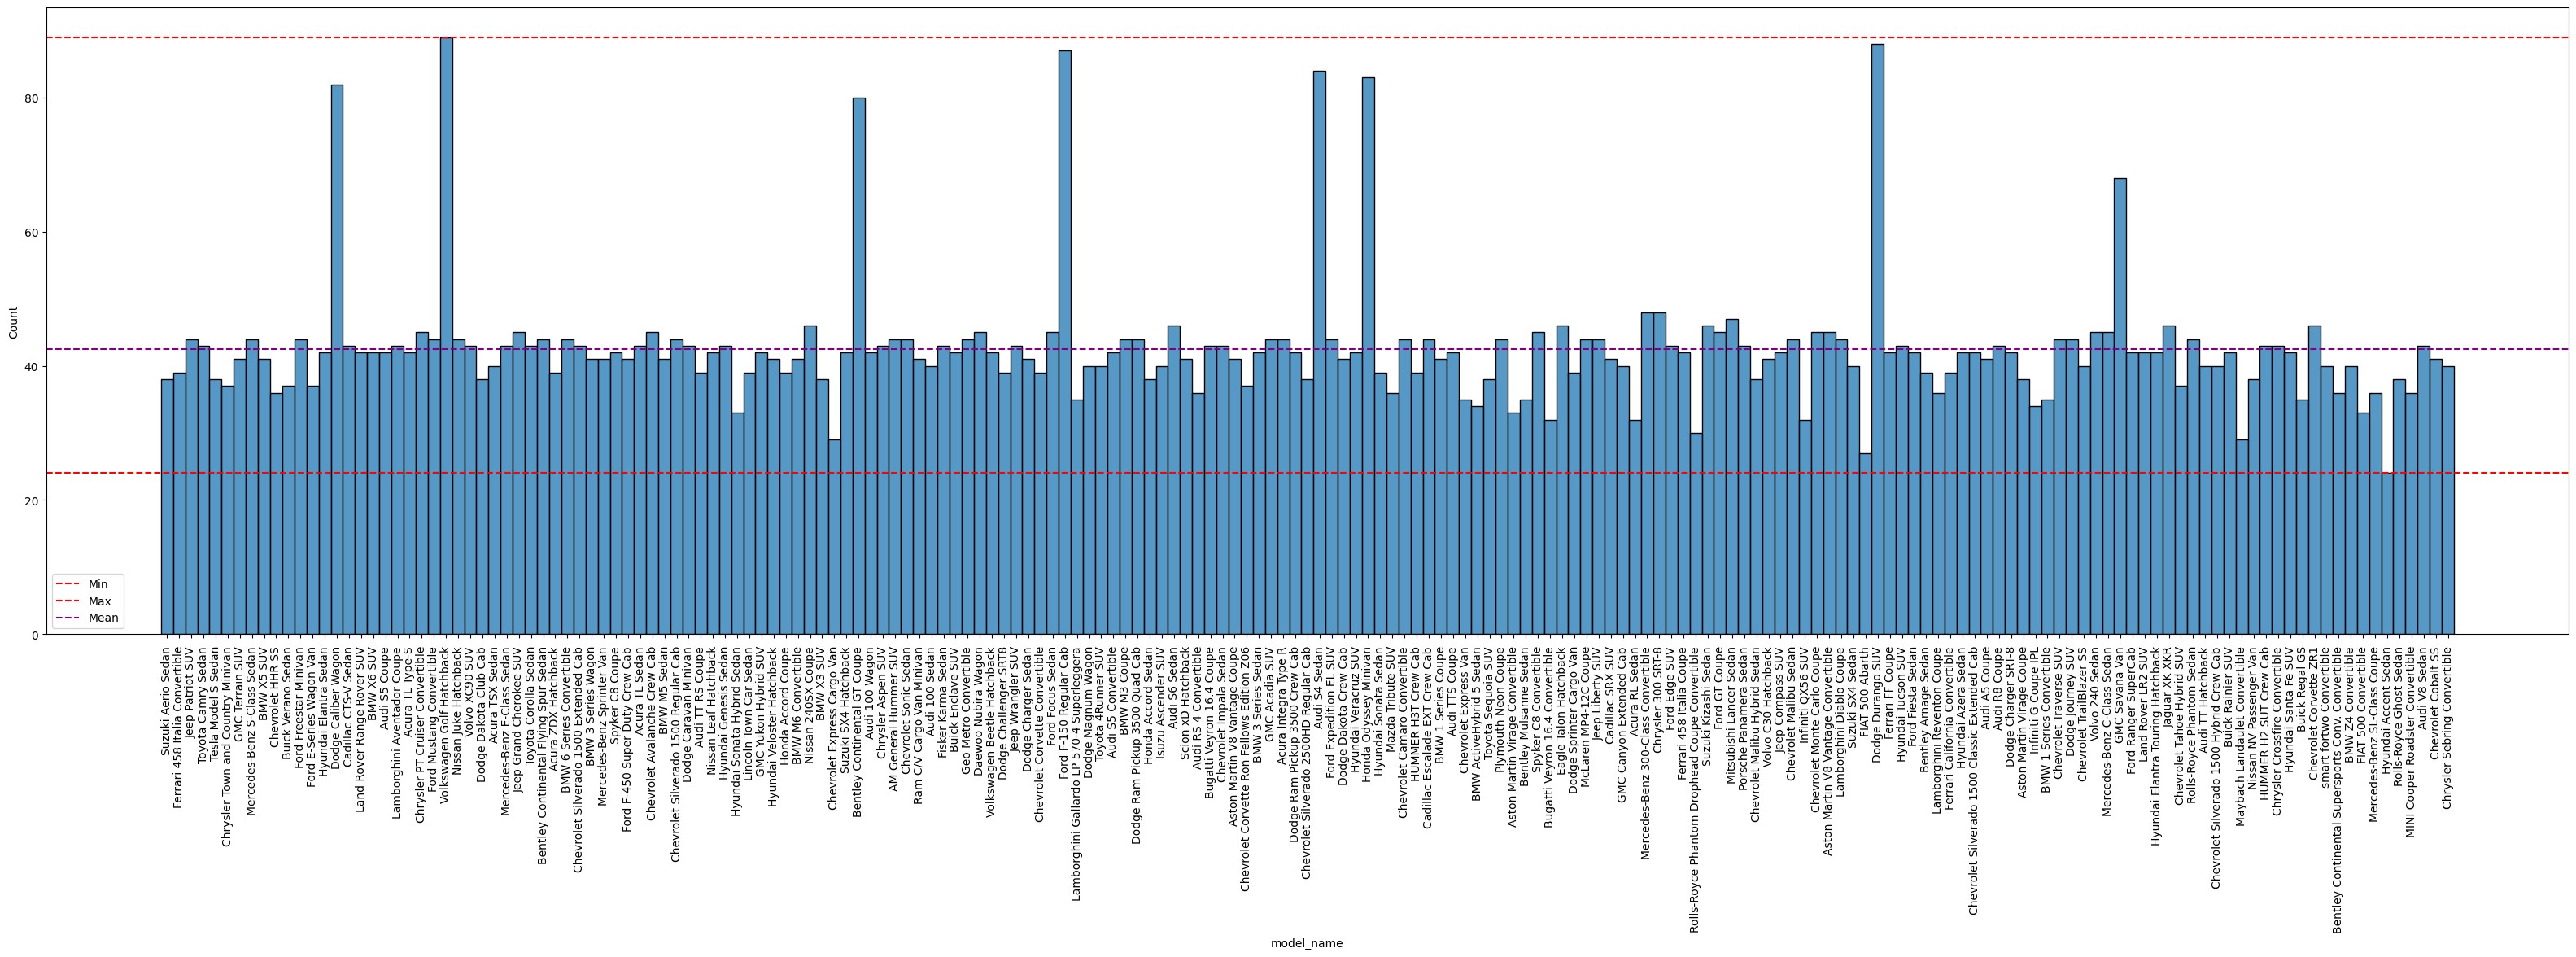

In [183]:
plot_top_model_without_year(test, 'model_name')

In [184]:
from wordcloud import WordCloud
import string 
punctuations = string.punctuation

def plot_wordcloud(df):
    txt = df['model_name'].values
    wordcloud = WordCloud(background_color='black', \
                          height=2000, width=4000).generate(str(txt))
    
    plt.figure(figsize=(20, 10))    
    plt.title('WordCloud du text initial')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

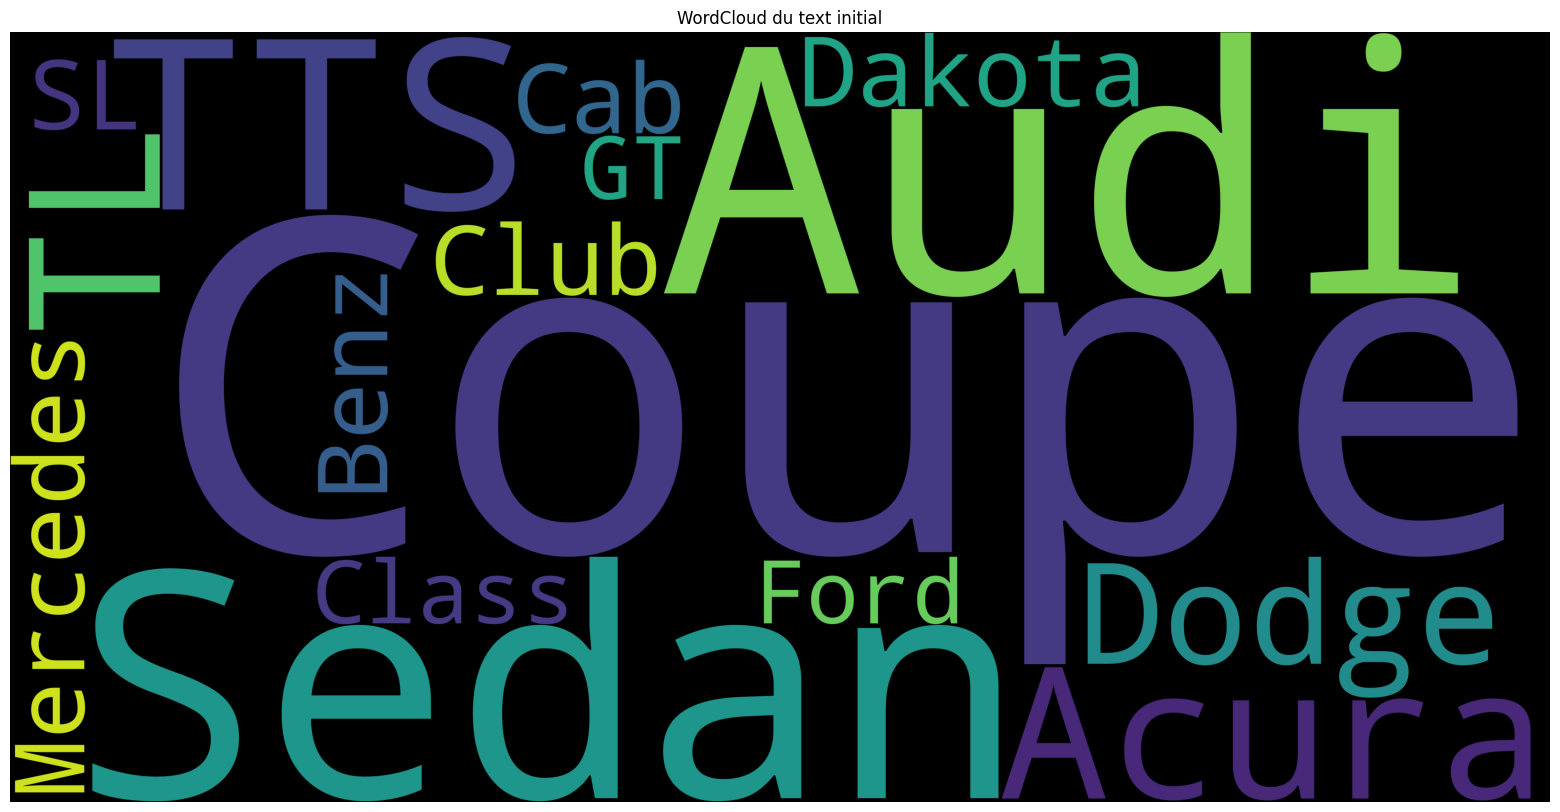

In [185]:
plot_wordcloud(train)

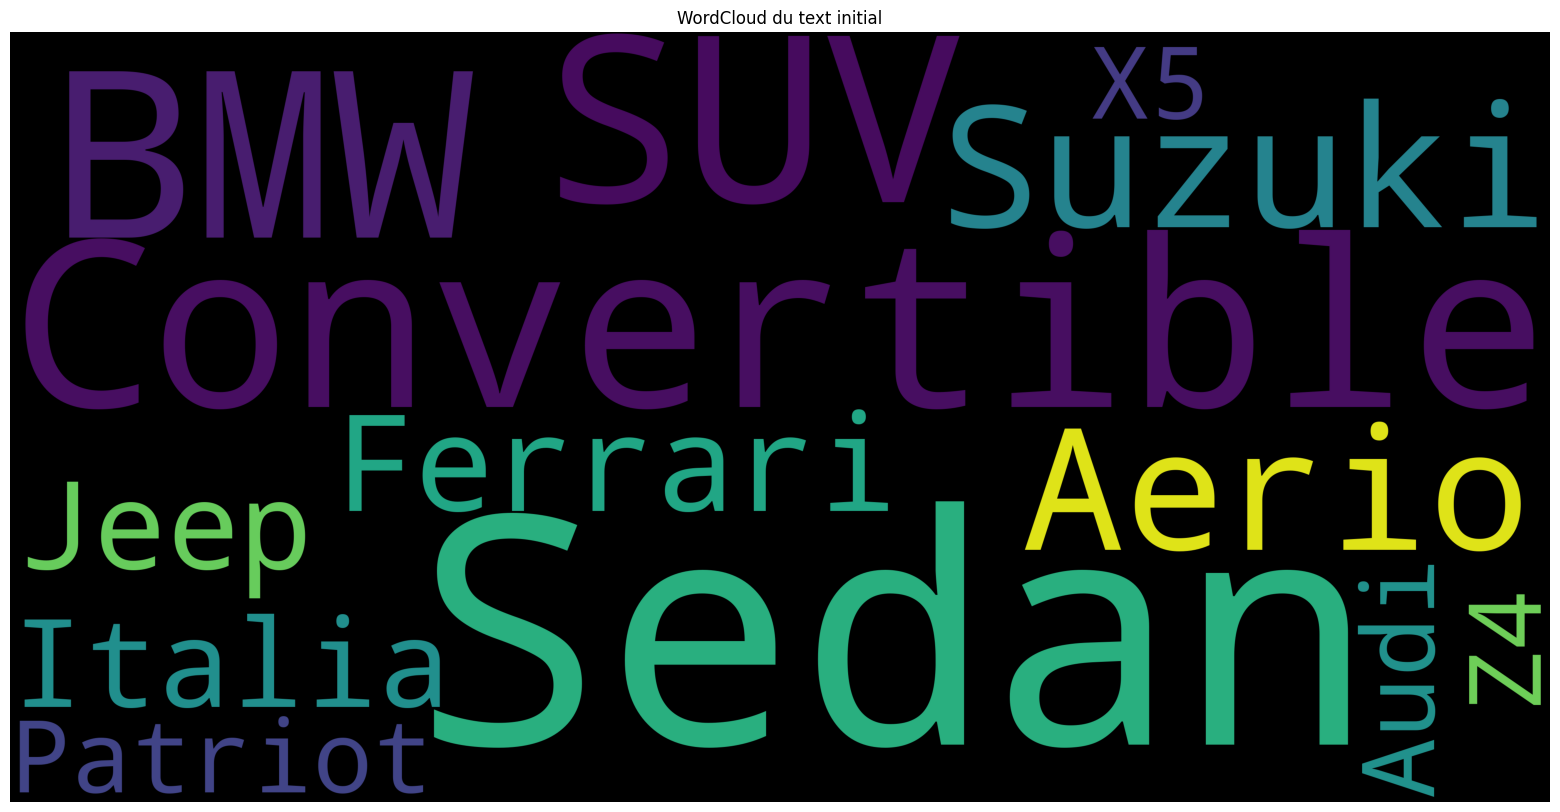

In [186]:
plot_wordcloud(test)

In [188]:
from collections import Counter

def plot_most_frequent(df, n):
    txt = df['model_name']
    
    # Comptage des mots pour les avis positifs
    words = Counter(" ".join(txt).split())
    most_common = words.most_common(n)
    
    # Préparation des données pour l'histogramme
    labels, values = zip(*most_common)
    negative_labels, negative_values = zip(*most_common)
    
    plt.figure(figsize=(15, 7))
    plt.bar(labels, values)
    plt.xticks(rotation=90)
    plt.show()

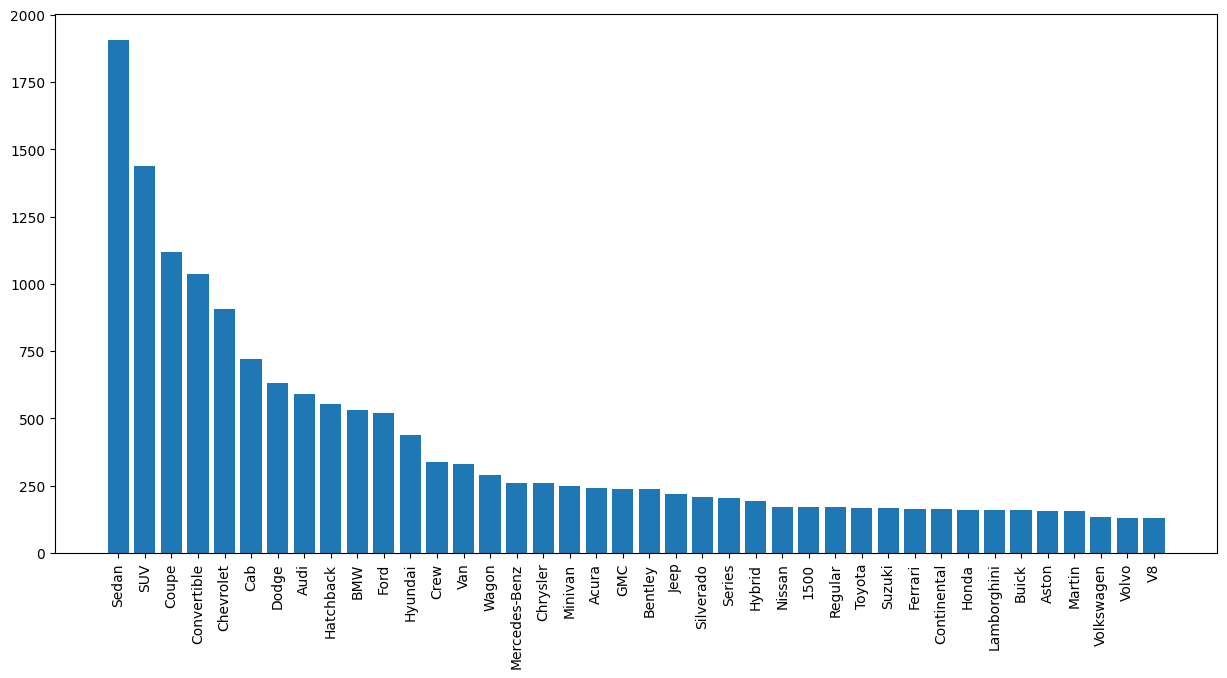

In [189]:
plot_most_frequent(train, 40)

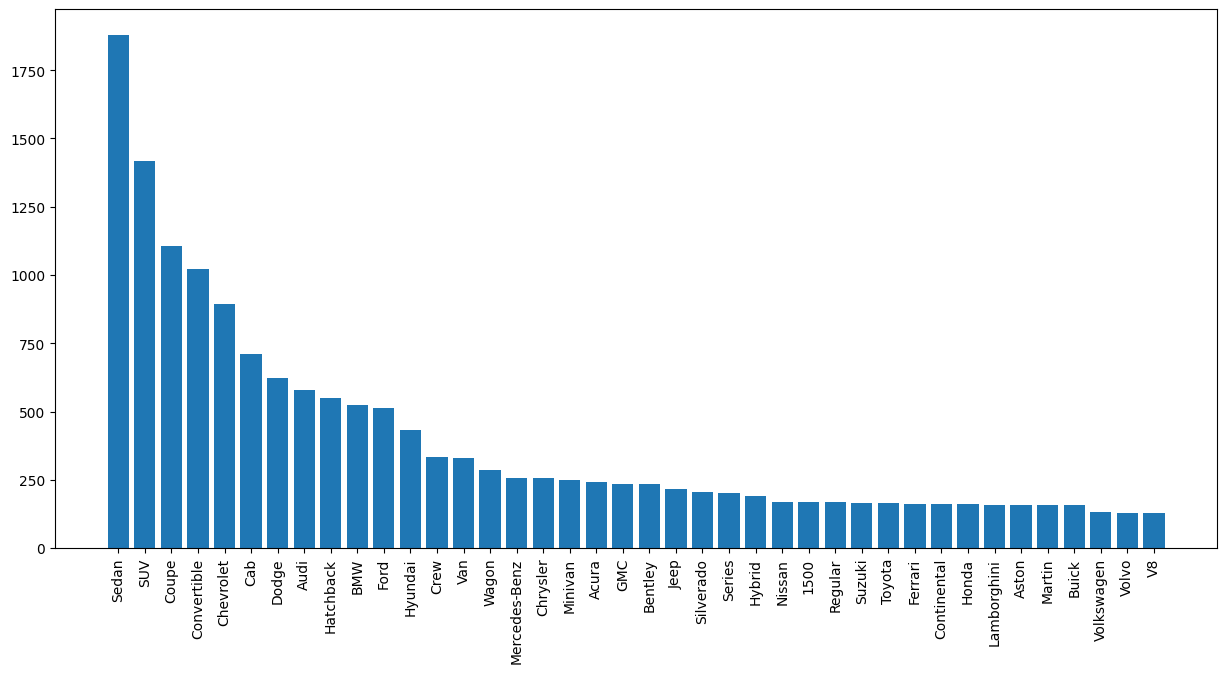

In [190]:
plot_most_frequent(test, 40)

```
Transfer learning is a machine learning technique where a model trained on one task is re-purposed on a second related task.
```

- aide à réduire la quantité de données nécessaires pour entraîner un model from scratch 
- aide à réduire les ressources de calcul nécessaires pour entraîner un model from scratch 
- aide à augmenter la capacité de généralisation, réduit rique d'overfitting
- peut permettre un apprentissage plus rapide

## Data Preprocessing and Data Augmentation

- Resizing images to size 400*400

- Normalizing pixel values to a range between 0 and 1

- Data Augmentation to improve the model generalization (rotation, flipping)

- Early Stopping to improve model efficiency and prevent overfitting

In [13]:
import torch # Check if CUDA is available

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available, using CPU instead.")

Using GPU: Tesla T4


In [14]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [15]:
transform = transforms.Compose([
    transforms.Resize((400, 400)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

In [16]:
transform = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(15),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform2 = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform3 = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.RandomRotation(90),
                                transforms.RandomHorizontalFlip(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [19]:
train_path = './data/car_data/car_data/train'
test_path = './data/car_data/car_data/test'

train_set = datasets.ImageFolder(train_path, transform=transform)
test_set = datasets.ImageFolder(test_path, transform=transform)

train_loader = DataLoader(train_set, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_set, batch_size=32, shuffle=True, num_workers=4)

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

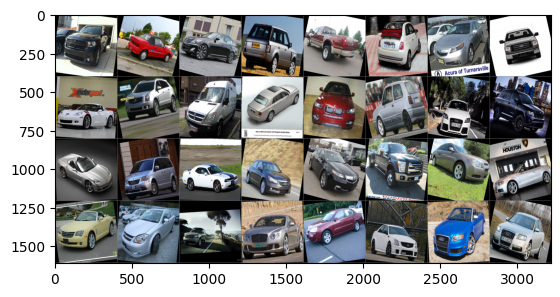

In [25]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
#print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

## Transfer Learning - ResNet18

In [33]:
import torchvision.models as models

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features

# getting the number of classes in the dataset
no_classes = len(train_set.classes)

# showing the architecture of the model
#model.parameters

### Remplacer le dernier fully connected layer par un nouveau

In [34]:
model.fc = torch.nn.Linear(num_ftrs, no_classes)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Loss Function / Optimizer / Learning rate schedular

- learning rate schedular -> change learning rate while training our model

- We are tracking the training accuracy
and measuring whether it increases by atleast 0.9 per epoch and if it hasn't increased by 0.9 reduce the learning by 0.1x.
However in this model it did not benefit me.

In [38]:
import torch.nn as nn
import torch.optim as optim

# defining the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

lrscheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, threshold=0.9)

## Training

In [43]:
from tqdm import tqdm
import time

def eval_model(model, test_loader, device, num_augmentations=1):
    correct = 0.0
    total = 0.0
    
    with torch.no_grad():
        # Iterate over the test data and generate predictions.
        for i, data in enumerate(test_loader, 0):
            # Get inputs
            images, labels = data
            # Transfer to GPU
            images = images.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(images)
            # Get predictions from the maximum value 
            _, predicted = torch.max(outputs.data, 1)
            # Total number of labels in the test data set
            total += labels.size(0) * num_augmentations
            # Total correct predictions
            correct += (predicted == labels.repeat(num_augmentations)).sum().item()
    # Calculate the accuracy
    test_acc = 100.0 * correct / total
    print('Accuracy of the network on the test images: ', test_acc)
    return test_acc

In [44]:
def train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, device, n_epochs = 5):
    # keeping track of losses and the accuracies
    losses = []
    accuracies = []
    test_accuracies = []
    # set the model to train mode initially (This is important as some models behave differently in train and test time.)
    model.train()
    # loop over the epochs
    for epoch in tqdm(range(n_epochs)):
        # keep track of the time for training the model for each epoch
        since = time.time()
        running_loss = 0.0
        running_correct = 0.0
        # iterate over the training data
        for i, data in enumerate(train_loader, 0):
            # get the inputs and assign them to cuda
            inputs, labels = data
            # Transfer to GPU
            inputs = inputs.to(device)
            labels = labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward pass
            outputs = model(inputs)
            # get the predictions
            _, predicted = torch.max(outputs.data, 1)
            # calculate the loss
            loss = criterion(outputs, labels)
            # backward pass
            loss.backward()
            # optimize the weights
            optimizer.step()
            # calculate the loss
            running_loss += loss.item()
            # calculate the accuracy
            running_correct += (labels==predicted).sum().item()
        # calculate the duration for each epoch
        epoch_duration = time.time()-since
        epoch_loss = running_loss/len(train_loader)
        epoch_acc = 100/32*running_correct/len(train_loader)
        print("Epoch %s, duration: %d s, loss: %.4f, acc: %.4f" % (epoch+1, epoch_duration, epoch_loss, epoch_acc))
        # append the losses and the accuracies
        losses.append(epoch_loss)
        accuracies.append(epoch_acc)
        # switch the model to eval mode to evaluate on test data
        model.eval()
        test_acc = eval_model(model, test_loader, device)
        test_accuracies.append(test_acc)
        # re-set the model to train mode after validating
        model.train()
        scheduler.step(test_acc)
        since = time.time()
    print('Finished Training')
    return model, losses, accuracies, test_accuracies

In [45]:
n_epochs = 10

# train the model
model, training_losses, training_accs, test_accs = train_model(model, train_loader, test_loader, criterion, 
                                                               optimizer, lrscheduler, device, n_epochs=n_epochs)
# Save the model
#torch.save(model.state_dict(), 'model.pth')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1, duration: 87 s, loss: 4.2857, acc: 12.4510


 10%|█         | 1/10 [02:05<18:51, 125.70s/it]

Accuracy of the network on the test images:  31.849272478547444
Epoch 2, duration: 88 s, loss: 1.9918, acc: 52.6225


 20%|██        | 2/10 [04:06<16:22, 122.84s/it]

Accuracy of the network on the test images:  58.01517224225842
Epoch 3, duration: 87 s, loss: 1.0386, acc: 75.0000


 30%|███       | 3/10 [06:05<14:05, 120.85s/it]

Accuracy of the network on the test images:  68.90933963437384
Epoch 4, duration: 86 s, loss: 0.6138, acc: 85.9314


 40%|████      | 4/10 [08:02<11:57, 119.61s/it]

Accuracy of the network on the test images:  74.55540355677155
Epoch 5, duration: 86 s, loss: 0.3897, acc: 90.6740


 50%|█████     | 5/10 [10:00<09:54, 118.92s/it]

Accuracy of the network on the test images:  74.03308046262903
Epoch 6, duration: 86 s, loss: 0.2878, acc: 93.3946


 60%|██████    | 6/10 [11:58<07:53, 118.48s/it]

Accuracy of the network on the test images:  80.62430046014177
Epoch 7, duration: 87 s, loss: 0.2013, acc: 95.6863


 70%|███████   | 7/10 [13:56<05:55, 118.48s/it]

Accuracy of the network on the test images:  79.41798283795548
Epoch 8, duration: 86 s, loss: 0.1023, acc: 98.3578


 80%|████████  | 8/10 [15:54<03:56, 118.36s/it]

Accuracy of the network on the test images:  87.82489740082079
Epoch 9, duration: 86 s, loss: 0.0773, acc: 98.9093


 90%|█████████ | 9/10 [17:52<01:58, 118.33s/it]

Accuracy of the network on the test images:  88.72030841935083
Epoch 10, duration: 86 s, loss: 0.0685, acc: 99.1176


100%|██████████| 10/10 [19:50<00:00, 119.07s/it]

Accuracy of the network on the test images:  88.59594577788832
Finished Training


loss function
optimizer
#epoch
learning rate
momentum
weight decay
dropout rate
batch size
kernel size
channel size
pooling size

## Plot training / validation results

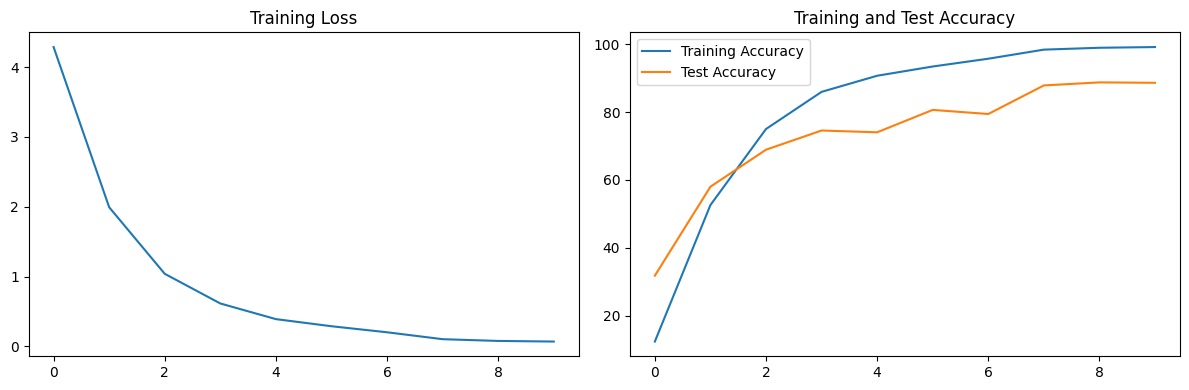

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot training loss
axs[0].plot(training_losses)
axs[0].set_title("Training Loss")

# Plot training and test accuracy
axs[1].plot(training_accs, label="Training Accuracy")
axs[1].plot(test_accs, label="Test Accuracy")
axs[1].set_title("Training and Test Accuracy")
axs[1].legend()

plt.tight_layout()
plt.show()

In [71]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

In [ ]:
target_layer = model.my_submodule
gradcam = GradCAM(model, target_layer)